In [1]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
def bistability (x0, t, parameters):
    # variable
    x = x0
    # parameters (dictionary)
    n = parameters['n']     # Hill coefficient
    lam = parameters['lam'] # degradation rate
    # ODE
    dxdt = x**n / (x**n + 1) - lam*x
    return dxdt

In [6]:
def bistability_plot(x0_1=0.1, x0_2=0.1, x0_3=0.1, n=4., lam=0.25):
    
    t  = np.arange(0, 100, 0.01)
    
    parameters = {'n': n, 'lam': lam}
    
    x1 = odeint(bistability, x0_1, t, args=(parameters,))
    x2 = odeint(bistability, x0_2, t, args=(parameters,))
    x3 = odeint(bistability, x0_3, t, args=(parameters,))
        
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(t, x1, label='x0_1')
    ax1.plot(t, x2, label='x0_2')
    ax1.plot(t, x3, label='x0_3')
    ax1.set_xlabel('time t'); ax1.set_ylabel('conc. x')
    ax1.grid()
    ax1.legend()
    
widget = interactive(bistability_plot, x0_1=(0., 6., 0.01), x0_2=(0., 6., 0.01), x0_3=(0., 6., 0.01), lam=(-0.1, 2., 0.02), n=4.)
display(widget)

interactive(children=(FloatSlider(value=0.1, description='x0_1', max=6.0, step=0.01), FloatSlider(value=0.1, d…

**Questions:**

What does n control?\
What happens for small $\lambda$?\
What happens with different initial conditions?\
What happens for large $\lambda$?

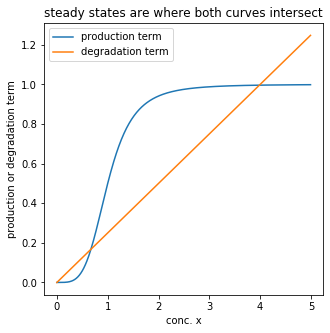

In [4]:
# BONUS 1: Graphical calculation of the steady states for lambda = 0.25
# ---------------------------------------------------------------------
parameters = {'n': 4, 'lam': 0.25}

# steady states appear where production terms = degradation
# we can have a look at the model to see what the production and degradation term is:
# production: prod = x**4 / (x**4 + 1) 
# degradation: deg = lam*x
x = np.arange(0, 5, 0.01)
production_term = x**parameters['n'] / (x**parameters['n'] + 1)
degradation_term = parameters['lam']*x

fig4 = plt.figure(figsize=(5,5))
ax4 = fig4.add_subplot(111)
ax4.plot(x, production_term, label="production term")
ax4.plot(x, degradation_term, label="degradation term")
ax4.set_title('steady states are where both curves intersect')
ax4.set_xlabel('conc. x'); ax4.set_ylabel('production or degradation term')
ax4.legend()


Text(0, 0.5, 'response $X$ss')

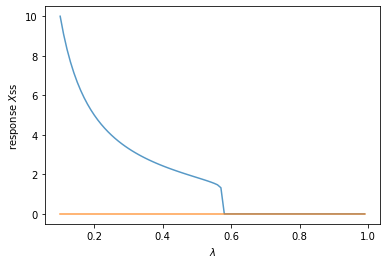

In [5]:
# BONUS 2
# We can illustrate the bistability by plotting the signal-response curve of the system for changes in lambda 
# in other words, we can plot the curve where we show how the steady state of the system changes as a function of lambda
# What we do is:
# 1. Change the parameter from smaller to larger value
# 2. Find the new steady state for that change of parameter
# 3. Store it (together with the lambda value that was used as 'input')
# 4. Iterate and start point 1 again
# and then:
# 5. Change the parameter from LARGER to SMALLER value
# 6. Find the new steady state for that change of parameter
# 7. Store it (together with the lambda value that was used as 'input')
# 8. Iterate and start point 1 again

t = np.arange(0, 100, 0.01)
lambda_values = np.arange(0.1, 1, 0.01)
x0 = 4 

list_steady_states = [] #empty list to store the steady state values
for l in lambda_values:
    # 1. change the parameter
    parameters['lam'] = l 
    # 2. solve ODE and find steady state for the new lambda value
    sol = odeint(bistability, x0, t, args=(parameters,))
    steady_state = sol[-1] #our last value of the simulation is the steady state
    # 3. store the steady state value
    list_steady_states.append(steady_state)
    # 4. now we use the steady state value as initial condition for the next iteration 
    x0 = steady_state

list_steady_states = np.asarray(list_steady_states)

# now we do the same but instead of changing labmda values in an increasing way, we change it from LARGER to SMALLER value:
lambda_values_rev = lambda_values[::-1]
list_steady_states_rev = []
x0 = .1

for l in lambda_values_rev:
    parameters['lam'] = l 
    sol = odeint(bistability, x0, t, args=(parameters,))
    steady_state = sol[-1] 
    list_steady_states_rev.append(steady_state)
    x0 = steady_state  

# plot
fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
ax5.plot(lambda_values, list_steady_states, alpha=0.75)
ax5.plot(lambda_values, list_steady_states_rev[::-1], alpha=0.75)
ax5.set_xlabel('$\lambda$')
ax5.set_ylabel('response $X$ss')